## Convolution
In OpenCV, the convolution operations are done using the function **`filter2D`** API.  

> Syntax:
``` python
	dst	=	cv.filter2D(	src, ddepth, kernel[, dst[, anchor[, delta[, borderType]]]]	)
```

### Parameters
* **`src`** Source image.
* **`dst`** output image of the same size and the same number of channels as src.
* **`ddepth `** desired depth of the destination image; if it is negative, it will be the same as src.depth(); the following combinations of src.depth() and ddepth are supported:
    *  **`src.depth() = CV_8U, ddepth = -1/CV_16S/CV_32F/CV_64F `**
    *  **`src.depth() = CV_16U/CV_16S, ddepth = -1/CV_32F/CV_64F `**
    *  **`src.depth() = CV_32F, ddepth = -1/CV_32F/CV_64F `**
    *  **`src.depth() = CV_64F, ddepth = -1/CV_64F `**
    * when  **`ddepth=-1 `**, the output image will have the same depth as the source.

* **`kernel`** convolution kernel (or rather a correlation kernel), a single-channel floating point matrix; if you want to apply different kernels to different channels, split the image into separate color planes using split() and process them individually.
* **`anchor`** anchor of the kernel that indicates the relative position of a filtered point within the kernel; the anchor should lie within the kernel; default value (-1,-1) means that the anchor is at the kernel center.
* **`delta`** optional value added to the filtered pixels before storing them in dst.
* **`borderType`** pixel extrapolation method (see borderInterpolate for details).


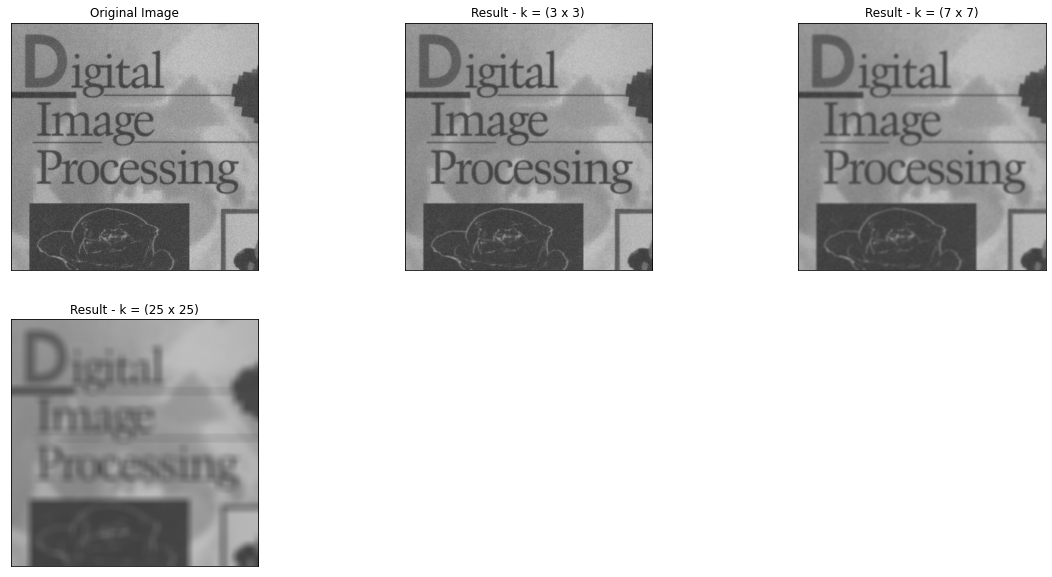

In [1]:
##########################################################################################
# Primary Contact    : v_s191@txstate.edu; vittal.siddaiah@gmail.com;
##########################################################################################
#Image Filtering using Convolution
import cv2
import math
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
###############################################

def TwoDimensionalFilter(rawImageData, kernelSizes=[0]):
    figIds = []
    # Generating FigureId's
    maxRows = math.ceil(len(kernelSizes)/3)
    figCounter = 0
    for row in range(maxRows):
        for col in range(3):
            figIds.append((maxRows*100)+30+(figCounter + 1))
            figCounter +=1
    plt.figure(figsize=[20,10])          
    counter = 0    
    for kernelSize in kernelSizes:
        if (kernelSize > 0):
            kernel = np.ones((kernelSize, kernelSize), dtype=np.float32) / kernelSize**2 
            #print(kernel)
            strKernel = "Result - k = (%d x %d)" % (kernelSize, kernelSize)
            plt.subplot(figIds[counter]);
            resultImageData = cv2.filter2D(imageData, -1, kernel, (-1, -1), delta=0, borderType=cv2.BORDER_DEFAULT)        
        else:
            strKernel = "Original Image"
            plt.subplot(figIds[counter]);
            resultImageData = rawImageData
        plt.imshow(resultImageData[..., ::-1])
        plt.xticks([]), plt.yticks([]) #To remove the ticks
        plt.title(strKernel)
        counter += 1
    return 

# Reading the Image
imageData = cv2.imread("../../../Images/book-cover-gaussian.tif")  #Color Image is Scanned
if imageData is None: print("Unable to open the image! please verify !!!")

        
TwoDimensionalFilter(imageData, kernelSizes = [0, 3, 7, 25])

